## Observations and Insights 

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [105]:
# Checking the number of mice.
total_number_of_mice_raw_data = len(study_data_complete["Mouse ID"].unique())
total_number_of_mice_raw_data

249

In [106]:
# what are the unique time points?
unique_time_points = study_data_complete["Timepoint"].unique()
unique_time_points

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [107]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_ID_and_timepoint = study_data_complete.loc[study_data_complete.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mouse_ID_and_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete_clean = study_data_complete.drop_duplicates(["Mouse ID", "Timepoint"])
study_data_complete_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

study_data_complete_clean_summary = study_data_complete_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
study_data_complete_clean_summary.columns = study_data_complete_clean_summary.columns.droplevel(0)

study_data_complete_clean_summary.rename(columns={"mean": "Tumor Volume Mean (mm3)","median": "Tumor Volume Median (mm3)", "var": "Tumor Volume Variance (mm3)", "std": "Tumor Volume Standard Deviation (mm3)", "sem": "Tumor Volume SEM",}, inplace=True)

study_data_complete_clean_summary.round(2)

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation (mm3),Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Text(0.5, 1.0, 'Total number of mice for each treatment throughout the course of the study')

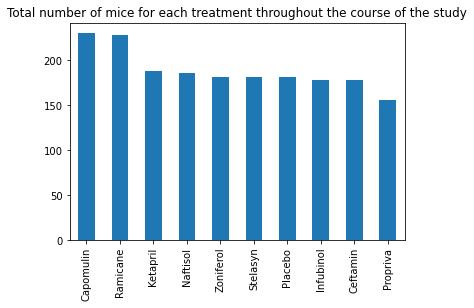

In [171]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

study_data_complete_clean['Drug Regimen'].value_counts().plot(kind='bar')
plt.title("Total number of mice for each treatment throughout the course of the study")


Text(0.5, 1.0, 'Total number of mice for each treatment throughout the course of the study')

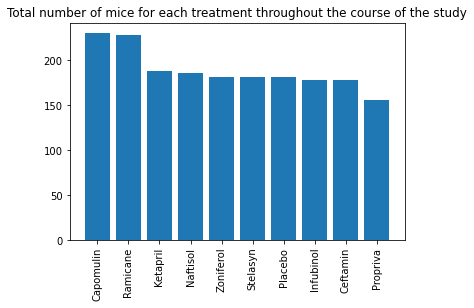

In [174]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_regiment_counts = study_data_complete_clean['Drug Regimen'].value_counts()
plt.bar(drug_regiment_counts.index, drug_regiment_counts)
plt.xticks(rotation=90)
plt.title("Total number of mice for each treatment throughout the course of the study")


In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

958

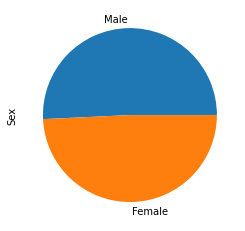

In [177]:
study_data_complete_clean['Sex'].value_counts().plot(kind='pie')


Text(0.5, 1.0, 'distribution of female versus male mice')

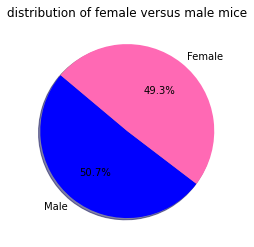

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

number_of_male_mice = len(study_data_complete_clean.loc[study_data_complete_clean["Sex"] == "Male"])
number_of_male_mice

number_of_female_mice = len(study_data_complete_clean.loc[study_data_complete_clean["Sex"] == "Female"])
number_of_female_mice

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [number_of_male_mice, number_of_female_mice]

# The colors of each section of the pie chart
colors = ["blue", "hotpink"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("distribution of female versus male mice")


## Quartiles, Outliers and Boxplots

In [180]:
study_data_complete_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html


In [ ]:
# # Example outlier plot of reaction times
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times);



# # We need to sort the data to determine which could be outliers
# times.sort()
# print(times)



# # The second example again looks at the LAX temperature data set and computes quantiles
# temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
# temperatures = temperature_df['HourlyDryBulbTemperature']

# fig1, ax1 = plt.subplots()
# ax1.set_title('Temperatures at LAX')
# ax1.set_ylabel('Temperature (°C)')
# ax1.boxplot(temperatures);



# # If the data is in a dataframe, we use pandas to give quartile calculations
# quartiles = temperatures.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of temperatures is: {lowerq}")
# print(f"The upper quartile of temperatures is: {upperq}")
# print(f"The interquartile range of temperatures is: {iqr}")
# print(f"The the median of temperatures is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [157]:
capomulin_treatments = study_data_complete_clean.loc[study_data_complete_clean["Drug Regimen"] == "Capomulin"]
# capomulin_treatments

# re-arrange columns
capomulin_treatments = capomulin_treatments[['Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]

# group dataframe by Timepoint
capomulin_treatments_timepoints_grouped = capomulin_treatments.groupby(["Timepoint"], as_index=False)

capomulin_treatments_timepoints_df = capomulin_treatments_timepoints_grouped.mean()
capomulin_treatments_timepoints_df.round(2)

,Timepoint,Tumor Volume (mm3),Weight (g)
0,0,45.00,20.12
1,5,44.27,20.12
2,10,43.08,20.12
3,15,42.06,20.00
4,20,40.72,19.78
5,25,39.94,19.91
6,30,38.77,19.91
7,35,37.82,19.91
8,40,36.96,19.86
9,45,36.24,19.86


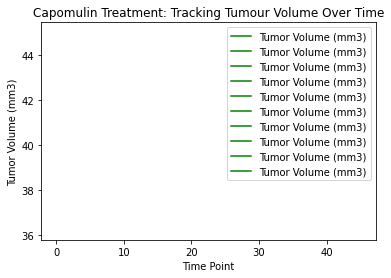

In [158]:
# Create a list of the timepoints that we will use as our x axis
timepoints = [capomulin_treatments_timepoints_df["Timepoint"].unique()]
tumor_volume = [capomulin_treatments_timepoints_df["Tumor Volume (mm3)"].unique()]

# Plot our line that will be used to track Capomulins effectiveness by measure of tumor volume over time
plt.plot(timepoints, tumor_volume, color="green", label="Tumor Volume (mm3)")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Capomulin Treatment: Tracking Tumour Volume Over Time")
plt.xlabel("Time Point")
# plt.xticks(np.arange(min(timepoints), max(timepoints)))
plt.ylabel("Tumor Volume (mm3)");                                                            

In [159]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_treatments

,Timepoint,Tumor Volume (mm3),Weight (g)
10,0,45.000000,17
11,5,43.878496,17
12,10,37.614948,17
13,15,38.177232,17
14,20,36.866876,17
...,...,...,...
440,45,47.685963,24
1452,0,45.000000,25
1453,5,45.597064,25
1454,10,46.059608,25


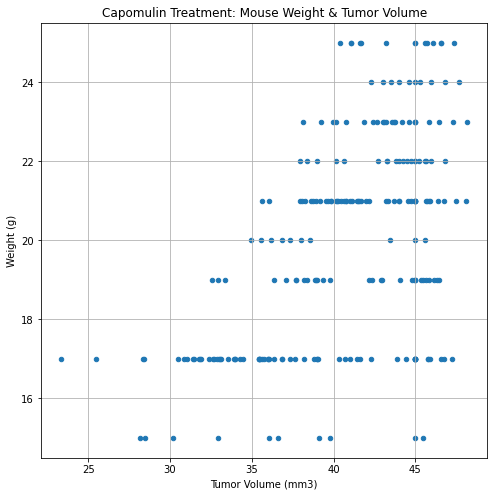

In [164]:
## I'M PRETTY SURE THIS ISN'T CORRECT, NEEDS REVIEWING ##
capomulin_treatments.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)", 
grid=True, figsize=(8,8), title="Capomulin Treatment: Mouse Weight & Tumor Volume")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# malic_acid = wine_data.malic_acid
# flavanoids = wine_data.flavanoids

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(******,******)[0],2)}")

In [ ]:
# # Plot malic_acid versus flavanoids on a scatterplot
# malic_acid = wine_data.malic_acid
# flavanoids = wine_data.flavanoids
# plt.scatter(malic_acid,flavanoids)
# plt.xlabel("Amount of Malic Acid")
# plt.ylabel("Amount of Flavanoids");


# # Calculate the correlation coefficient between malic_acid and flavanoids
# print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(malic_acid,flavanoids)[0],2)}")


# # BONUS: Generate the correlation matrix and find the strongest positive and negative correlations
# wine_corr = wine_data.corr()
# wine_corr.unstack().sort_values()

In [ ]:
# # Generate a scatter plot of year versus violent crime rate
# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
# plt.scatter(year,violent_crime_rate)
# plt.xticks(year, rotation=90)
# plt.xlabel('Year')
# plt.ylabel('Violent Crime Rate');


# # Perform a linear regression on year versus violent crime rate
# vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, violent_crime_rate)


# # Create equation of line to calculate predicted violent crime rate
# vc_fit = vc_slope * year + vc_int


# # Plot the linear model on top of scatter plot 
# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
# plt.scatter(year,violent_crime_rate)
# plt.plot(year,vc_fit,"--")
# plt.xticks(year, rotation=90)
# plt.xlabel('Year')
# plt.ylabel('Violent Crime Rate');


# # Generate a facet plot of all 3 figures
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

# ax1.set_xlim(min(year), max(year))
# ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
# ax1.plot(year, vc_fit, "b--", linewidth=1)
# ax1.set_ylabel("Violent Crime Rate")

# ax2.plot(year, murder_rate, linewidth=1, marker="o", color="r")
# ax2.plot(year, m_fit, "r--", linewidth=1)
# ax2.set_ylabel("Murder Rate")

# ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
# ax3.plot(year, aa_fit, "g--", linewidth=1)
# ax3.set_ylabel("Aggravated Assault Rate")
# ax3.set_xlabel("Year");